## Code to make Fig 4
Elena Savidge
<br>
3 Aug 2023

In [14]:
# import rasterio
# from rasterio.plot import show
import matplotlib.pyplot as plt
import cartopy
#import rioxarray as rxr
import xarray as xr
import cmocean
from pyhdf.SD import SD, SDC
import cartopy.crs as ccrs
import pandas as pd
import numpy as np
import pyproj
from pyproj import Proj, transform, CRS
# import rasterio as rio
# from rasterio.plot import show
from glob import glob
from matplotlib.collections import PatchCollection
from shapely.geometry import Point, Polygon
import geopandas as gpd
import scipy
from scipy import ndimage
from cartopy.geodesic import Geodesic
import datetime
from scipy.signal import savgol_filter

In [15]:
# NOTE: need dir to be set up this way for pyproj to work
pyproj.datadir.set_data_dir('/opt/anaconda3/envs/sealenv/share/proj') 

/opt/anaconda3/envs/polyarea/lib/python3.11/site-packages/pyproj/datadir.py:38: UserWarning: pyproj unable to set database path.
  _global_context_set_data_dir()


In [16]:
pwd

'/Users/elenasavidge/Documents/Documents - Elena’s MacBook Pro/PhD_Ch2/manuscriptcode_2'

## Read in data

In [17]:
ther_pixel = pd.read_pickle('thermal_area_effectivepixel_fixed') # don't need thermal for this fig b/c not in intervals of interest
vis_pixel = pd.read_pickle('visible_area_effectivepixel_fixed')  #doesnt matter if save .pkl or not

## Partition by date for 2007 event 

In [18]:
# contrain dates
int4 = vis_pixel[(vis_pixel['Date']>='2007-05-01') & (vis_pixel['Date']<='2008-01-01')]

int4w = ther_pixel[(ther_pixel['Date']>='2007-05-01') & (ther_pixel['Date']<='2008-01-01')]

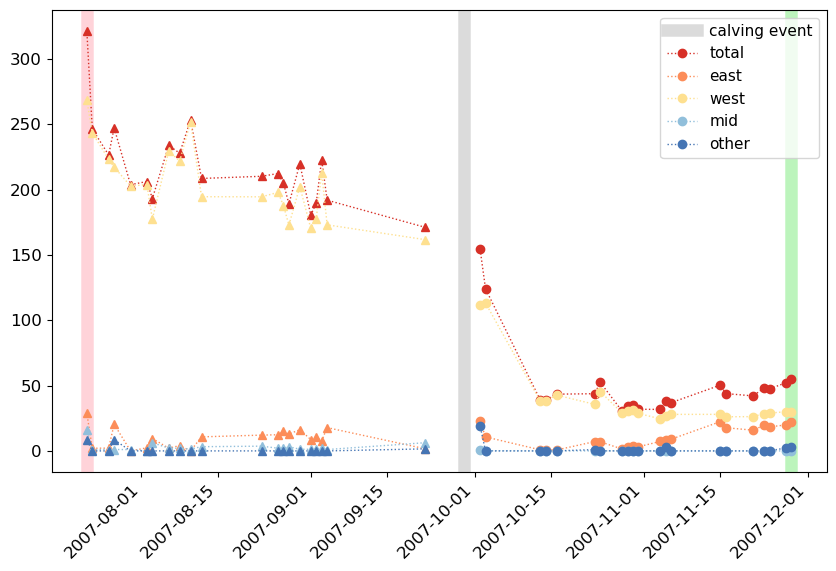

In [41]:
plt.figure(figsize=(10,6))
plt.axvline(datetime.datetime(2007, 9, 29),linestyle='-',c='lightgrey',alpha=0.8,linewidth=9, label='calving event')

plt.axvline(datetime.datetime(2007, 7, 22),c='lightpink',alpha=0.6,linewidth=9)
plt.axvline(datetime.datetime(2007, 11, 28),c='lightgreen',alpha=0.6,linewidth=9)

plt.plot(int4['Date'],int4['total'], ':o',label='total',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(int4['Date'],int4['east'], ':o',label='east', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(int4['Date'],int4['west'], ':o',label='west',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(int4['Date'],int4['mid'], ':o',label='mid',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(int4['Date'],int4['other'], ':o',label='other',c ='#4575b4',linewidth= 1, markersize = 6) # this will be closely linked to calving!!!!

plt.plot(int4w['Date'],int4w['total'], ':^',c='#d73027',linewidth= 1, markersize = 6)
plt.plot(int4w['Date'],int4w['east'], ':^', c = '#fc8d59',linewidth= 1, markersize = 6)
plt.plot(int4w['Date'],int4w['west'], ':^',c = '#fee090',linewidth= 1, markersize = 6)
plt.plot(int4w['Date'],int4w['mid'], ':^',c='#91bfdb',linewidth= 1, markersize = 6)
plt.plot(int4w['Date'],int4w['other'], ':^',c ='#4575b4',linewidth= 1, markersize = 6) # this will be closely linked to calving!!!!

#plt.ylabel('Polynya area [$\mathregular{km^{2}}$]',fontsize=12)#,plt.xlabel('Date',fontsize=15)
plt.legend(fontsize=11,loc='best')
# plt.yticks(fontsize=12)
plt.xticks(rotation=45, ha='right',fontsize=12)
plt.yticks(fontsize=12)
#plt.xlim([datetime.date(2000, 1, 1), datetime.date(2001, 12, 31)])

plt.savefig('fig4a.png', format='png',  bbox_inches="tight",dpi=400)
#plt.show()

In [8]:
pwd

'/Users/elenasavidge/Documents/Documents - Elena’s MacBook Pro/PhD_Ch2/manuscriptcode_2'

## b. 2007/07/22 plot largest polynya

In [39]:
# Make list of all MOD09 files in folder
MODfiles = glob('../polynyatimeseries/20070722/MYD09.A2007203.2320.006.2015132235445.hdf')  #this one is used for area calc
#MODfiles = glob('20070904/MYD09.A2007247.2205.061.2021070215116.hdf')
#MODfiles = glob('../polynyatimeseries/20070723/MYD09.A2007204.2225.006.2015133002320.hdf')  

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
#B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
B31 = (mod09.select('BAND31')[:]/100)-273.15
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
#lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

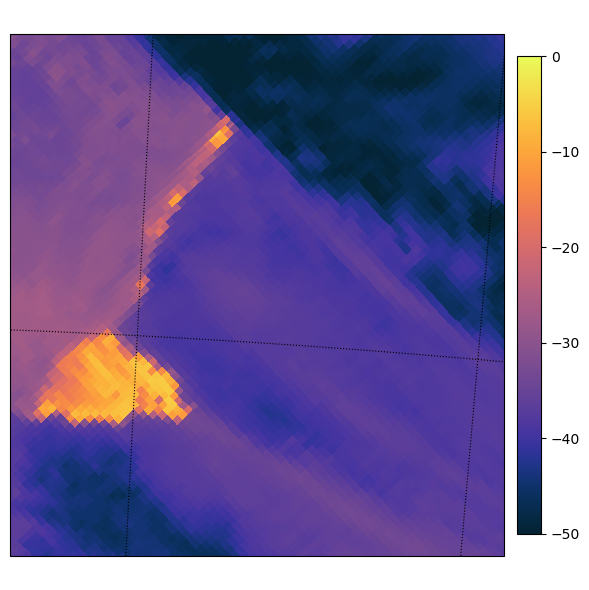

In [40]:
# Plot
llcrnrlat=-75.3;urcrnrlat=-74.55;llcrnrlon=-102.7;urcrnrlon=-100 

fig,ax = plt.subplots(figsize=(6,6)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels = False

#data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)
data = m.pcolormesh(lon,lat,B31,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-50,vmax=0)

cb = plt.colorbar(data,fraction=0.045,pad=0.025,orientation='vertical')#,shrink=0.84)

#plt.savefig('Cbar.png', format='png',  bbox_inches="tight",dpi=400)

plt.tight_layout()

## c. 2007/11/28 post calving example

In [12]:
# Make list of all MOD09 files in folder
MODfiles = glob('../polynyatimeseries/20071128/MOD09.A2007332.0705.061.2021079092431.hdf')  #this one is used for area calc
#MODfiles = glob('20070904/MYD09.A2007247.2205.061.2021070215116.hdf')

# Open first MODIS file and extract temperature, lats, lons
mod09 = SD(MODfiles[0], SDC.READ)   
B1 = (mod09.select('250m Surface Reflectance Band 1')[:])
#B31 = (mod09.select('BAND31')[:]/100)-273.15
lat = mod09.select('Latitude')[:]
lon = mod09.select('Longitude')[:]

# upsample 1 km lat, lon to 250 m - to match resolution of visible bands
lat250,lon250 = scipy.ndimage.zoom(lat, 4, order=1),scipy.ndimage.zoom(lon, 4, order=1)

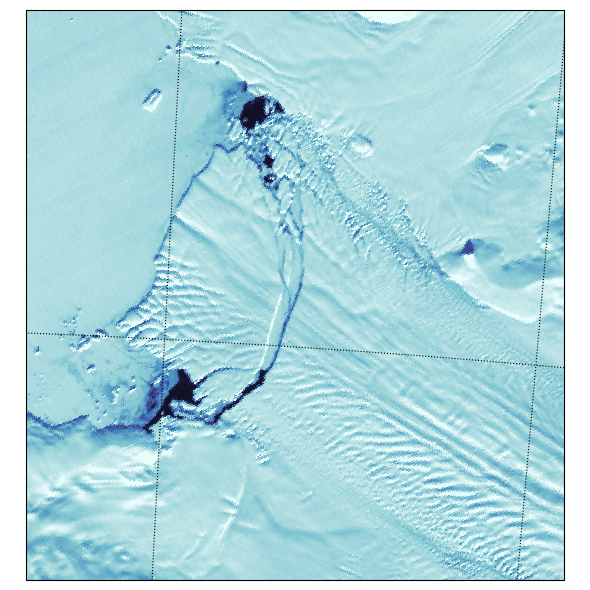

In [13]:
# Plot
llcrnrlat=-75.3;urcrnrlat=-74.55;llcrnrlon=-102.7;urcrnrlon=-100 

fig,ax = plt.subplots(figsize=(6,6)) # give two axes 

plt.axis('off')
m = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=-105.0))
m.set_extent([llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat], ccrs.PlateCarree())
gl = m.gridlines(draw_labels=True,xlocs=[-110,-108,-106,-104,-102,-100],ylocs=[-75.5,-75,-74.5,-74,-73,-72,-71],y_inline=False,color='k',linestyle=':')
gl.bottom_labels = gl.right_labels = gl.top_labels = gl.left_labels =  False

data = m.pcolormesh(lon250,lat250,B1,transform=ccrs.PlateCarree(),cmap=cmocean.cm.ice,vmin=0,vmax=10000)
#data = m.pcolormesh(lon,lat,B31,transform=ccrs.PlateCarree(),cmap=cmocean.cm.thermal,vmin=-30,vmax=0)

#cb = plt.colorbar(data,fraction=0.045,pad=0.025,orientation='horizontal')#,shrink=0.84)
#plt.savefig('Dpanel.png', format='png',  bbox_inches="tight",dpi=400)

plt.tight_layout()

## Save all panels and make fig in ppt

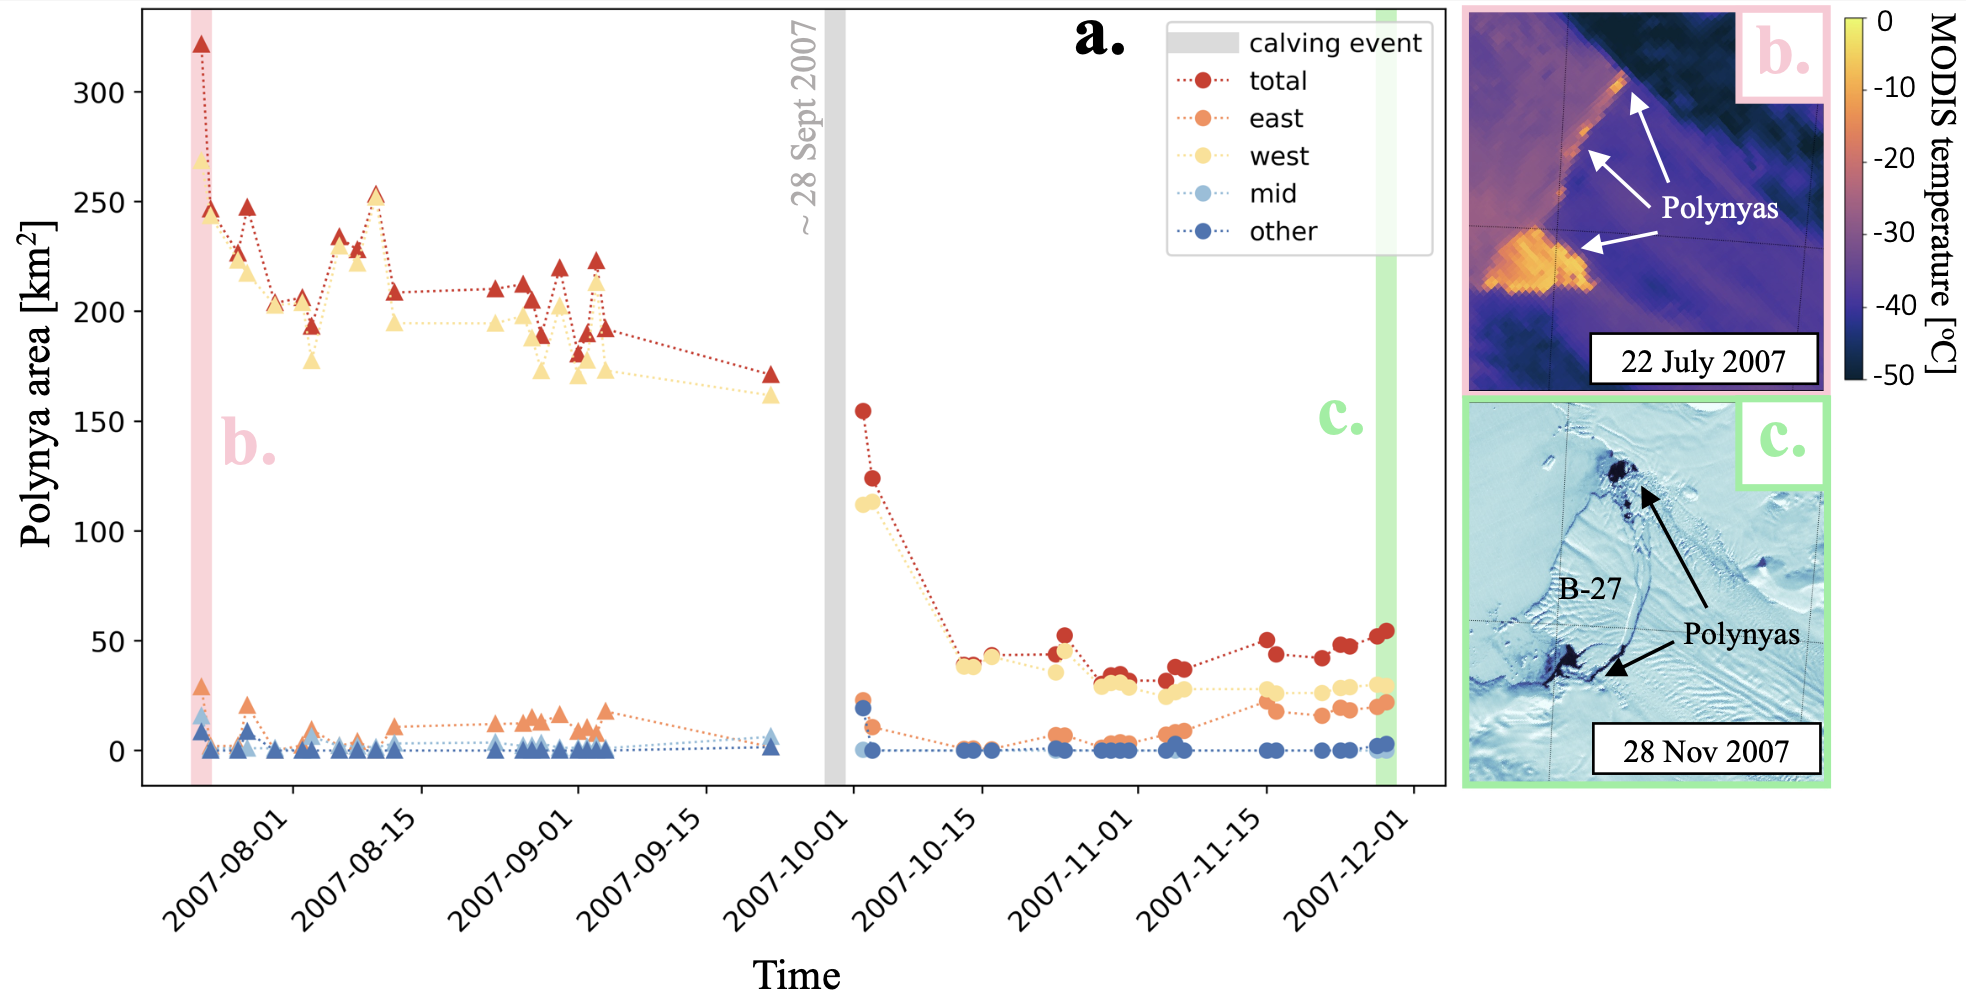